In [0]:
import torch
import matplotlib.pyplot as plt

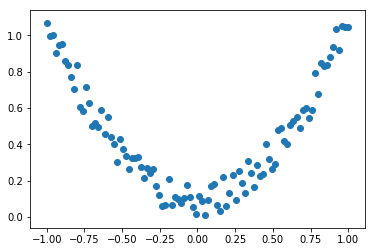

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [8]:
import torch.nn.functional as F
class Net(torch.nn.Module):
  def __init__(self,n_feature,n_hidden,n_output):
    super(Net,self).__init__()
    self.hidden = torch.nn.Linear(n_feature,n_hidden)
    self.predict = torch.nn.Linear(n_hidden,n_output)
    
  def forward(self,x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x
net = Net(n_feature = 1,n_hidden = 10,n_output =1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


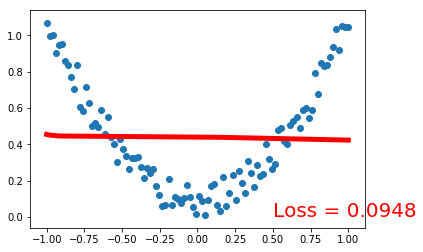

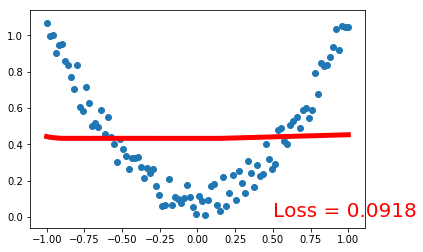

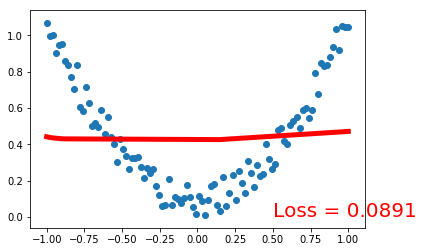

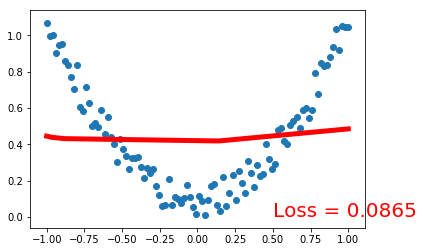

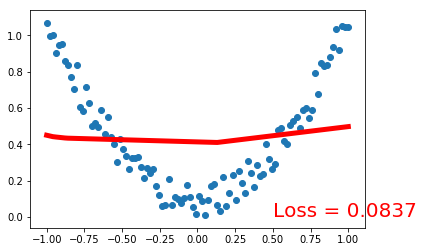

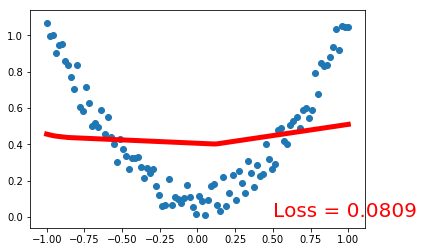

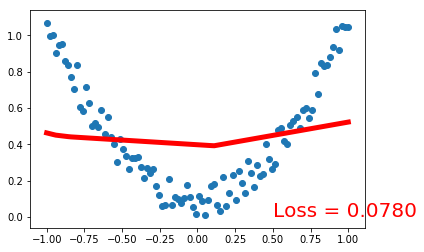

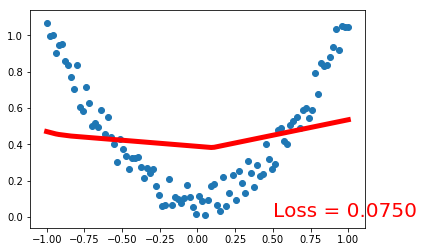

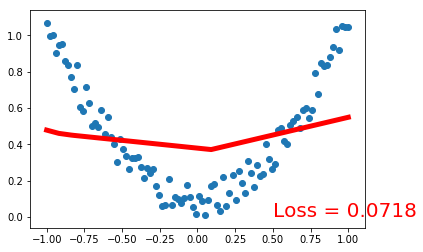

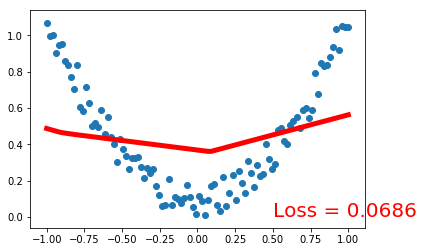

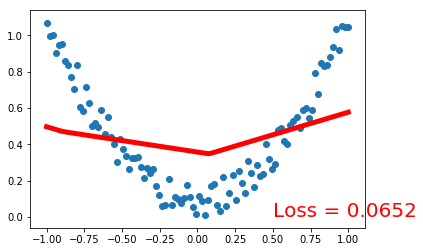

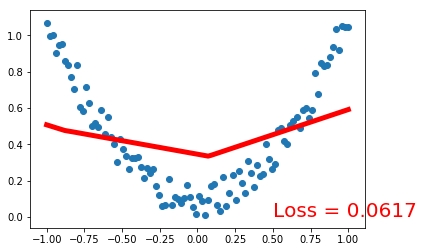

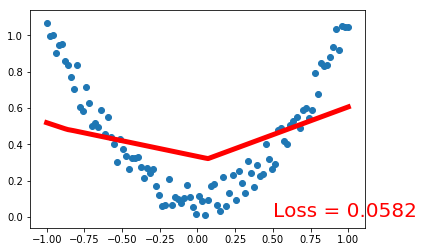

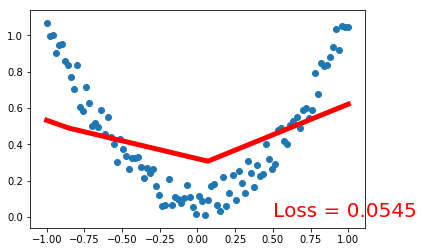

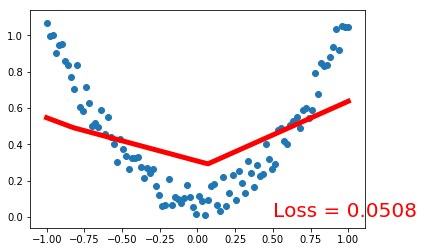

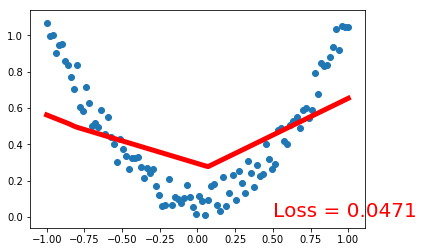

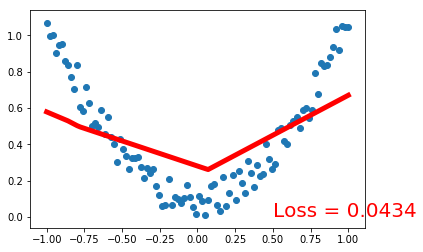

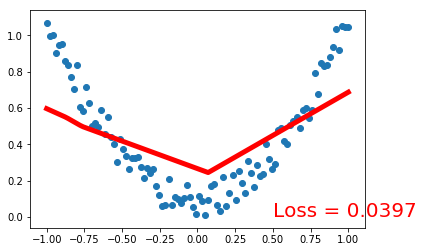

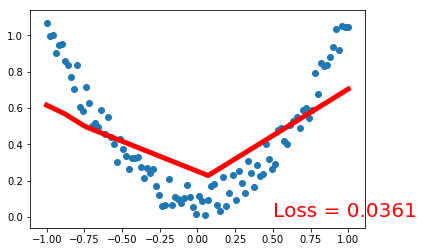

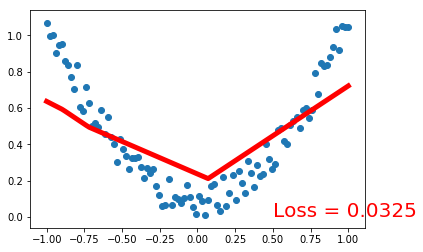

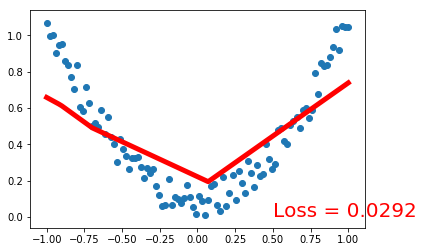

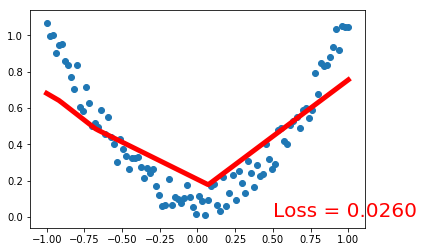

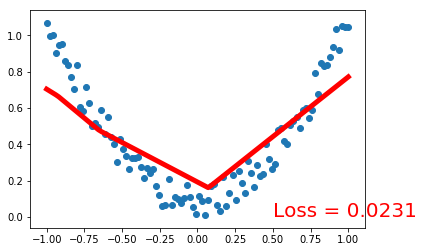

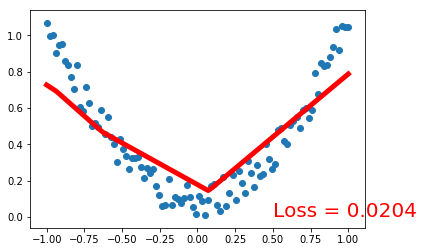

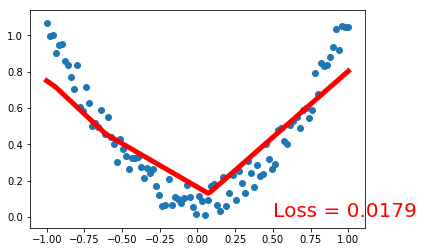

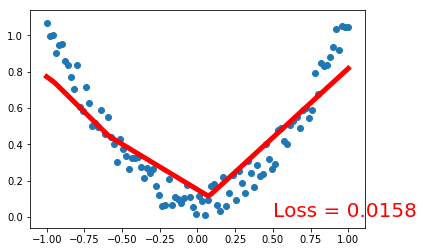

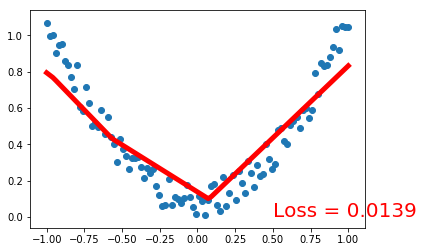

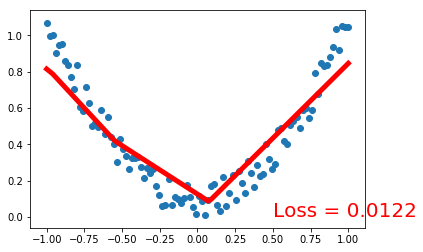

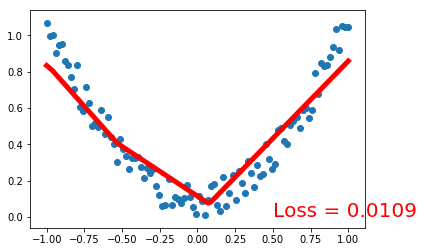

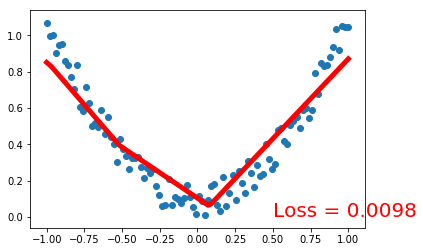

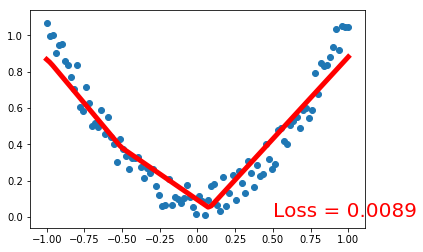

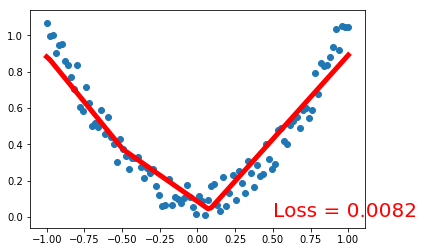

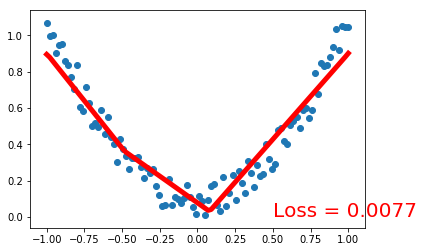

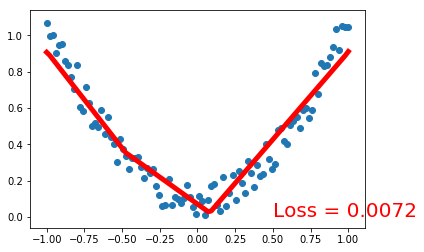

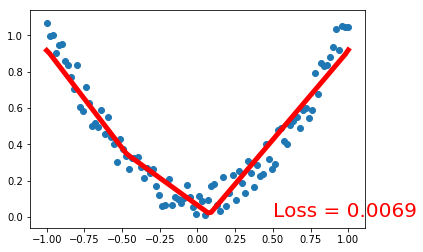

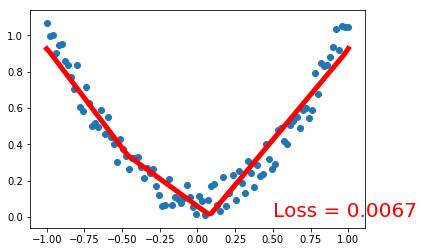

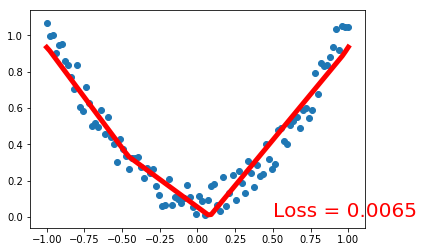

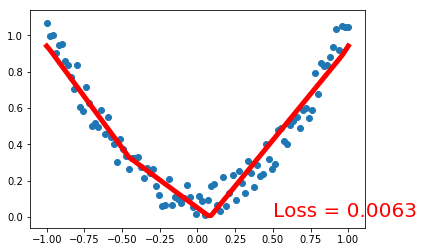

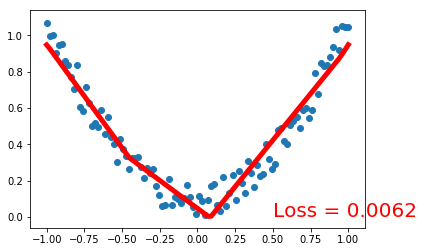

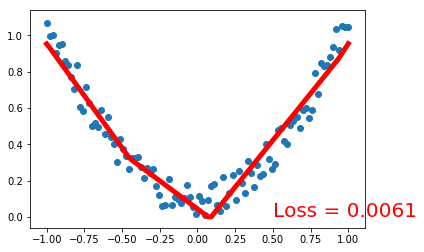

In [14]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.2)
loss_func = torch.nn.MSELoss()
plt.ion()
plt.show()

Epoch = 200
for epoch in range(Epoch):
  prediction = net(x)
  loss = loss_func(prediction ,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 5 == 0:
    plt.cla()
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw = 5)
    plt.text(0.5,0,'Loss = %.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
    plt.pause(0.1)